# Page 1 Results Summary

This is a notebook that I used to processed the `.csv` data from each question.
I could just embed it directly into the quarto, but this separation allows me to better outline my thinking while I develop and debug.

## Shuffling the results

I will only show the working here once, as I have a workflow in the future.

I am running a notebook on my mac where I use homebrew as a package manager. To shuffle a file inplace, we can use the linux utility shuf, which is a part of coreutils.

In [1]:
# !brew install coreutils

I needed the following command to be ran to properly get the install to go through...

In [2]:
# !brew unlink md5sha1sum

In [3]:
# !brew install coreutils

In [4]:
# !shuf --version

In [5]:
# !cat page1.csv

In [6]:
# !shuf --output=page1.csv <page1.csv

In [7]:
# !cat page1.csv

Since I ran this notebook more than once, the initial CSV is now completely lost...

## Per-question results

### Question 0 - preparing data

We will be reading the data here, and processing later..

In [8]:
import csv
import numpy as np

results = []

with open('page1.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=",")
    for row in csv_reader:
        results.append(list(map(int, row)))

res_array = np.array(results)

print(f"Question 1: a) Scores {res_array[:,:1].tolist()}")  

Question 1: a) Scores [[5], [5], [5], [5], [5], [3], [5], [5], [5], [5], [2], [5], [5], [5], [5], [5], [5], [5], [5], [5], [3], [5], [5], [5], [5], [5], [5], [5], [5], [5], [3]]


I decided Numpy would be easy enough to lean on here since it's a math library...

### Question 1

#### a. A pointer variable is used to:

In [9]:
import matplotlib.pyplot as plt

def print_stats(A, bins = [-1,0.1,1.1,2.1,3.1,4.1,5.1]):
    print(f"Mean: {np.mean(A)}")
    print(f"Median: {np.median(A)}")
    vals, counts = np.unique(A, return_counts=True)
    print(f"Mode: {A[np.argmax(counts)]} With count: {counts[np.argmax(counts)]}")
    plt.hist(A, bins = bins, align='right')

Mean: 4.709677419354839
Median: 5.0
Mode: [5] With count: 27


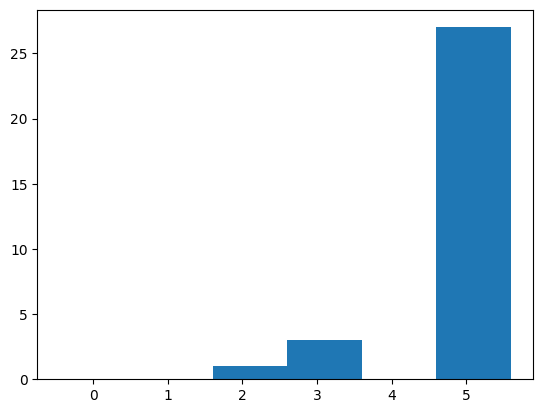

In [10]:
print_stats(res_array[:,:1])

#### b. A reference variable is used to:

Mean: 4.935483870967742
Median: 5.0
Mode: [5] With count: 30


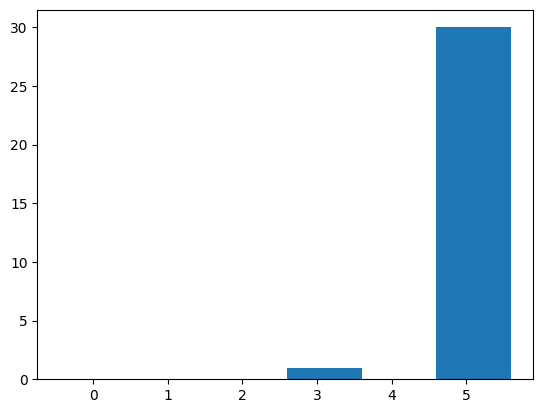

In [11]:
print_stats(res_array[:,1:2])

### Question 2

#### a. Allocate an array...

Mean: 3.967741935483871
Median: 5.0
Mode: [1] With count: 17


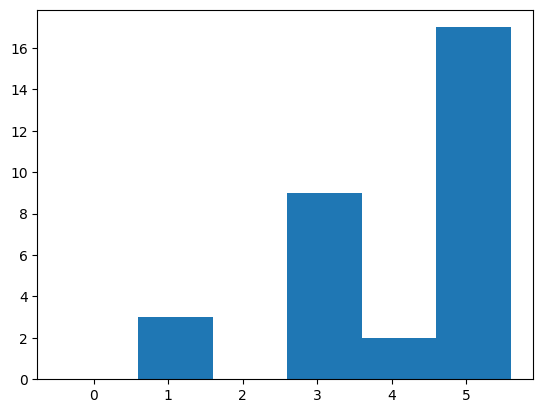

In [12]:
print_stats(res_array[:,2:3])

#### b. Delete the array...

Mean: 2.4193548387096775
Median: 3.0
Mode: [0] With count: 10


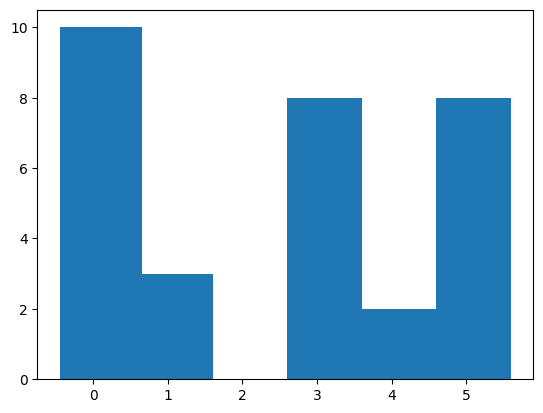

In [13]:
print_stats(res_array[:,3:4])

## Page results

Mean: 4.008064516129032
Median: 5.0
Mode: [3 5 5 0] With count: 82


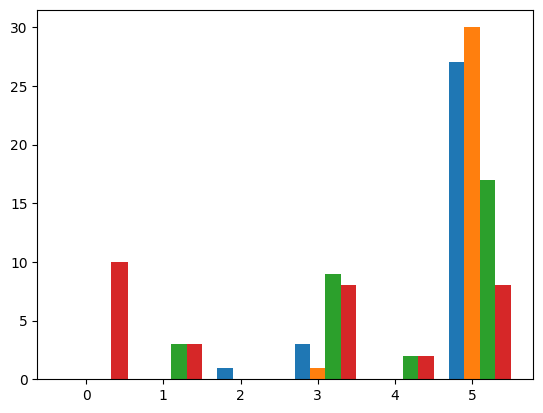

In [14]:
#| label: fig-page-1-breakdown
#| fig-cap: >
#|    Results for each question on page 1

print_stats(res_array)

Mean: 16.032258064516128
Median: 16.0
Mode: 18 With count: 8


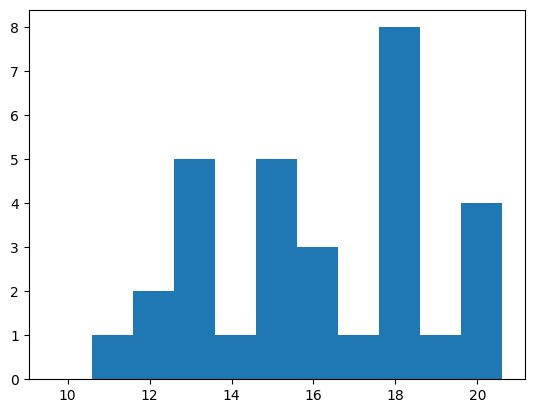

In [29]:
#| label: fig-page-1-totals
#| fig-cap: >
#|    Totals for page 1

print_stats(np.sum(res_array, axis=1), bins = [x + 0.1 for x in range(9,21)])

### After scaling

Mean: 18.016129032258064
Median: 18.0
Mode: 19.0 With count: 8


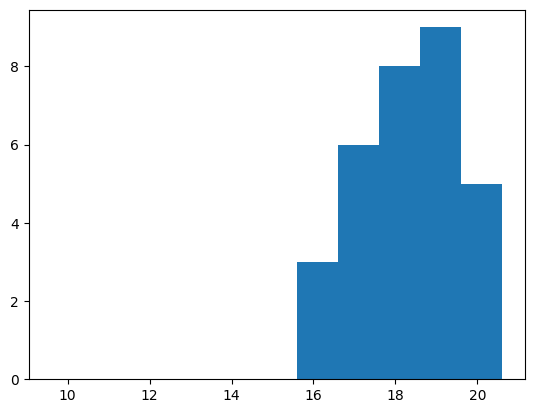

In [30]:
#| label: fig-page-1-scaled
#| fig-cap: >
#|    Totals for page 1 after scaling

f = lambda x: x + (20 - x) / 2

print_stats(f(np.sum(res_array, axis=1)), bins = [x + 0.1 for x in range(9,21)])